### Algoritmo DBSCAN de clustering

#### Utilizamos primero el comando DBSCAN del paquete sklearn.cluster


In [6]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [7]:
# Tomamos nubes aleatorias y graficamos los puntos.
X, v = make_blobs(n_samples=60, centers=4, cluster_std=0.60, random_state=0)
datos = pd.DataFrame(X)
datos.columns = ["x", "y"]
datos.head()

,x,y
0,-0.555524,4.695958
1,2.161723,0.656595
2,-0.679905,7.742454
3,-0.633953,4.055416
4,-1.409058,8.316934


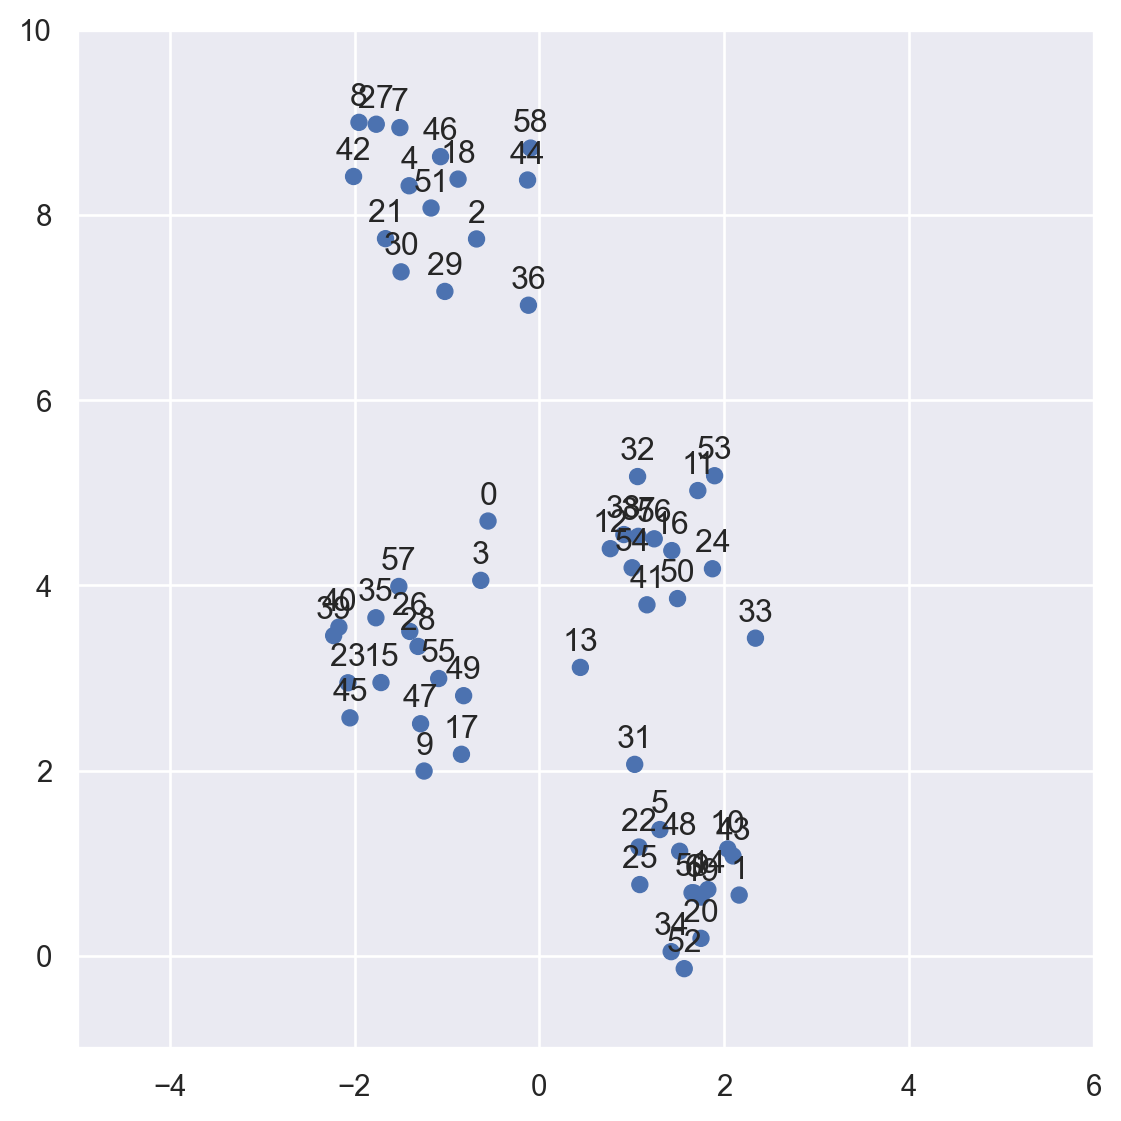

In [8]:
# El método Text nos permite incorporar texto a los nodos, es otro canal que podemos usar para codificar información.
# Podemos usarla para el número de nodo o para identificar el cluster.

(
    so.Plot(x = X[:,0], y = X[:,1], text = datos.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-5, 6), y=(-1, 10))
    .layout(size=(6, 6))  # Conviene graficar en un cuadrado para ver correctamente las distancias
)

In [9]:
# Elegimos eps mas chico que la distancia que vemos entre clusters.
# Elegimos min_samples según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?)
clustering = DBSCAN(eps=1, min_samples=8)
etiqueta = clustering.fit_predict(X)
print(etiqueta)

[-1  0  1  3  1  0  0  1  1  3  0  2  2  2  0  3  2  3  1  0  0  1  0  3
  2  0  3  1  3  1  1  0  2  2  0  3  1  2  2  3  3  2  1  0  1  3  1  3
  0  3  2  1  0  2  2  3  2  3  1  0]


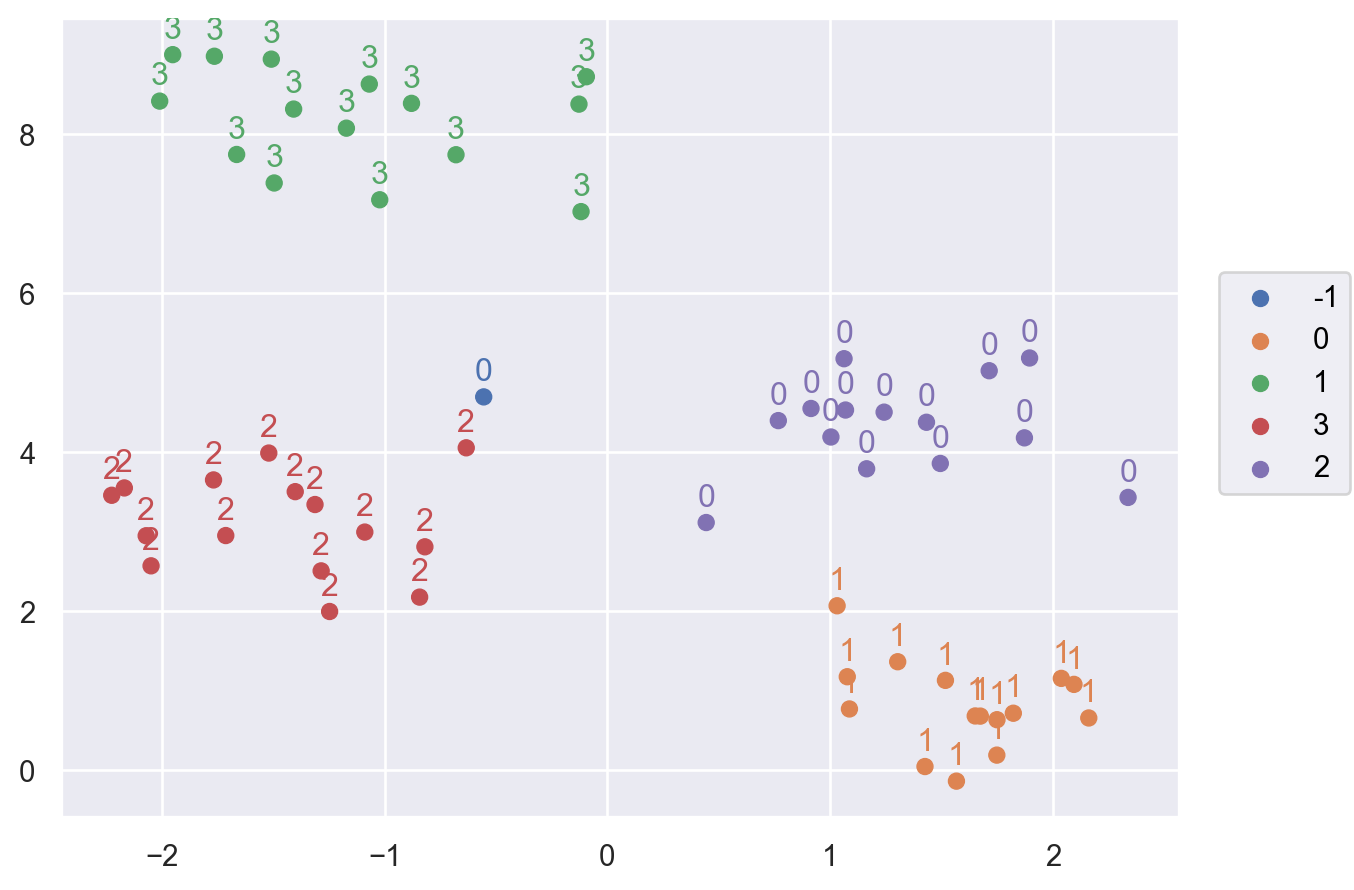

In [10]:
# Graficamos
(
    so.Plot(x = X[:,0], y = X[:,1], color = etiqueta.astype("str"), text = v.astype("str"))
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    #.layout(size=(4, 4))
)

En el último gráfico, ¿cuáles puntos fueron marcados como outliers? 

Fuera de los outliers, ¿quedó algún punto marcado incorrectamente?

Veamos ahora un ejemplo para el cual $k$-medias no resulta adecuado.

In [11]:
X, labels_true = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state = 42)
X = StandardScaler().fit_transform(X)

datos = pd.DataFrame(X)
datos.columns = ["x", "y"]
datos

,x,y
0,0.812184,0.302644
1,-0.783413,0.216127
2,-0.952174,0.331033
3,-0.538641,0.716837
4,0.799661,-1.592954
...,...,...
995,0.447599,1.652729
996,-1.764011,-0.511299
997,-0.127683,-0.944987
998,1.185388,-1.411580


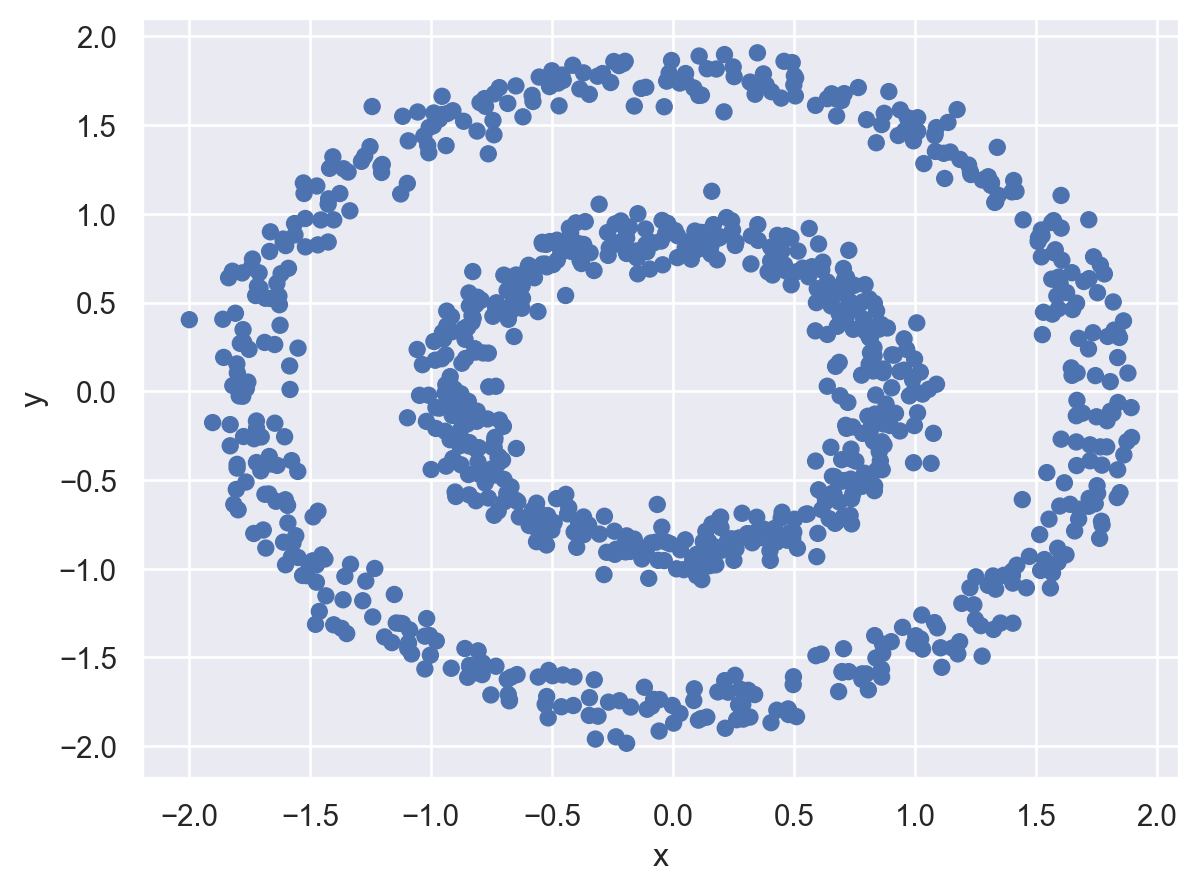

In [12]:
# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y")
    .add(so.Dot())
)

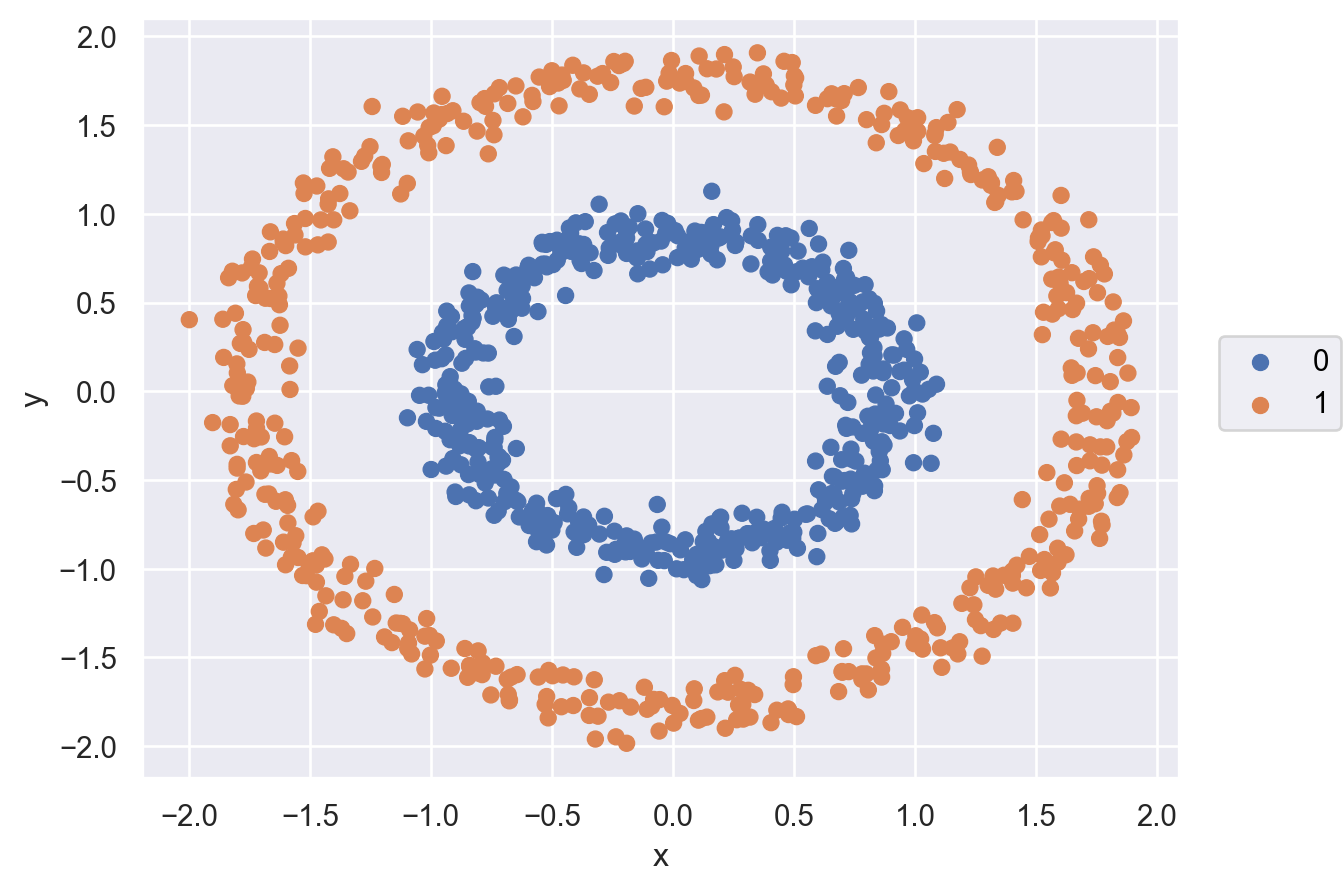

In [13]:
# Elegimos eps mas chico que la distancia que vemos entre clusters.
# Elegimos min_samples según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?)
clustering = DBSCAN(eps=0.3, min_samples=10)
etiqueta = clustering.fit_predict(datos)

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y", color = etiqueta.astype("str"))
    .add(so.Dot())
)

Repetir para el siguiente ejemplo.

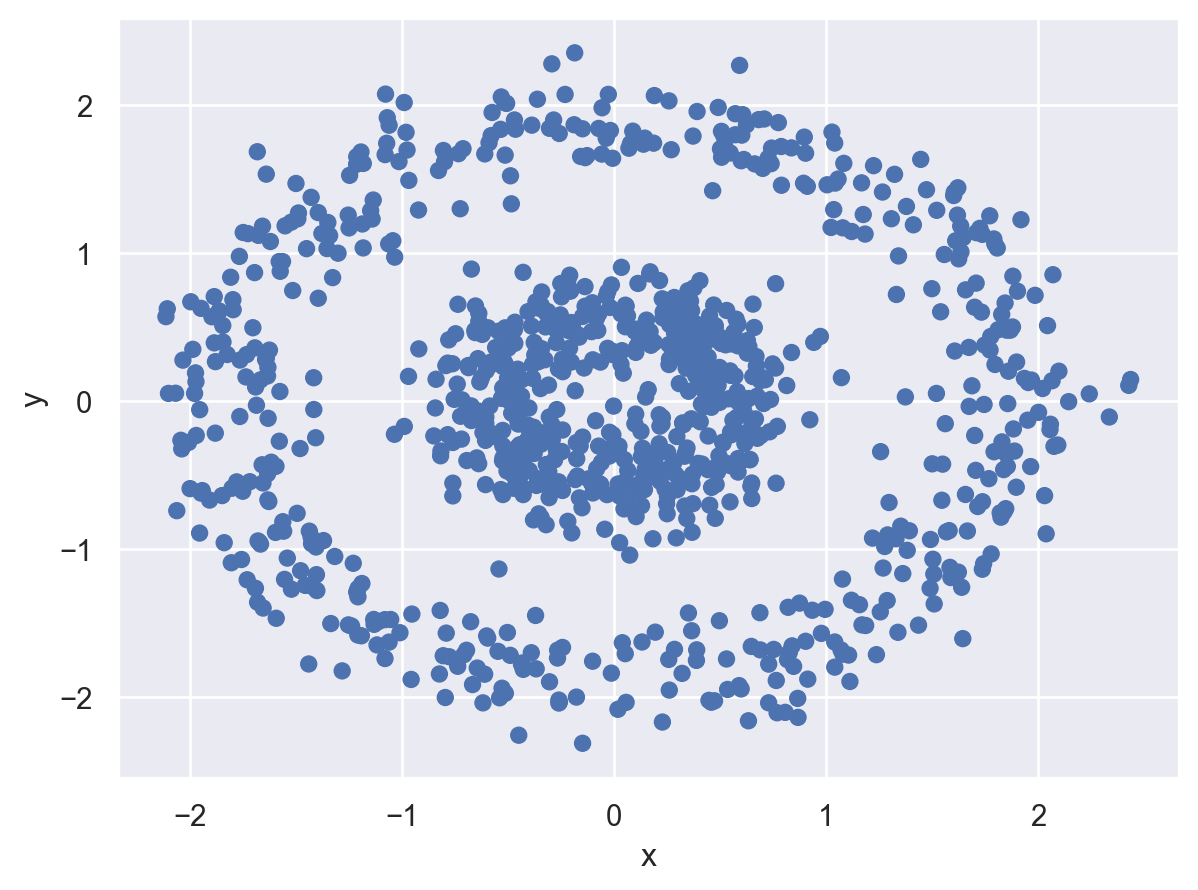

In [165]:
X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state = 5)
X = StandardScaler().fit_transform(X)   # Centramos los datos

datos = pd.DataFrame(X)
datos.columns = ["x", "y"]
datos

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y")
    .add(so.Dot())
)

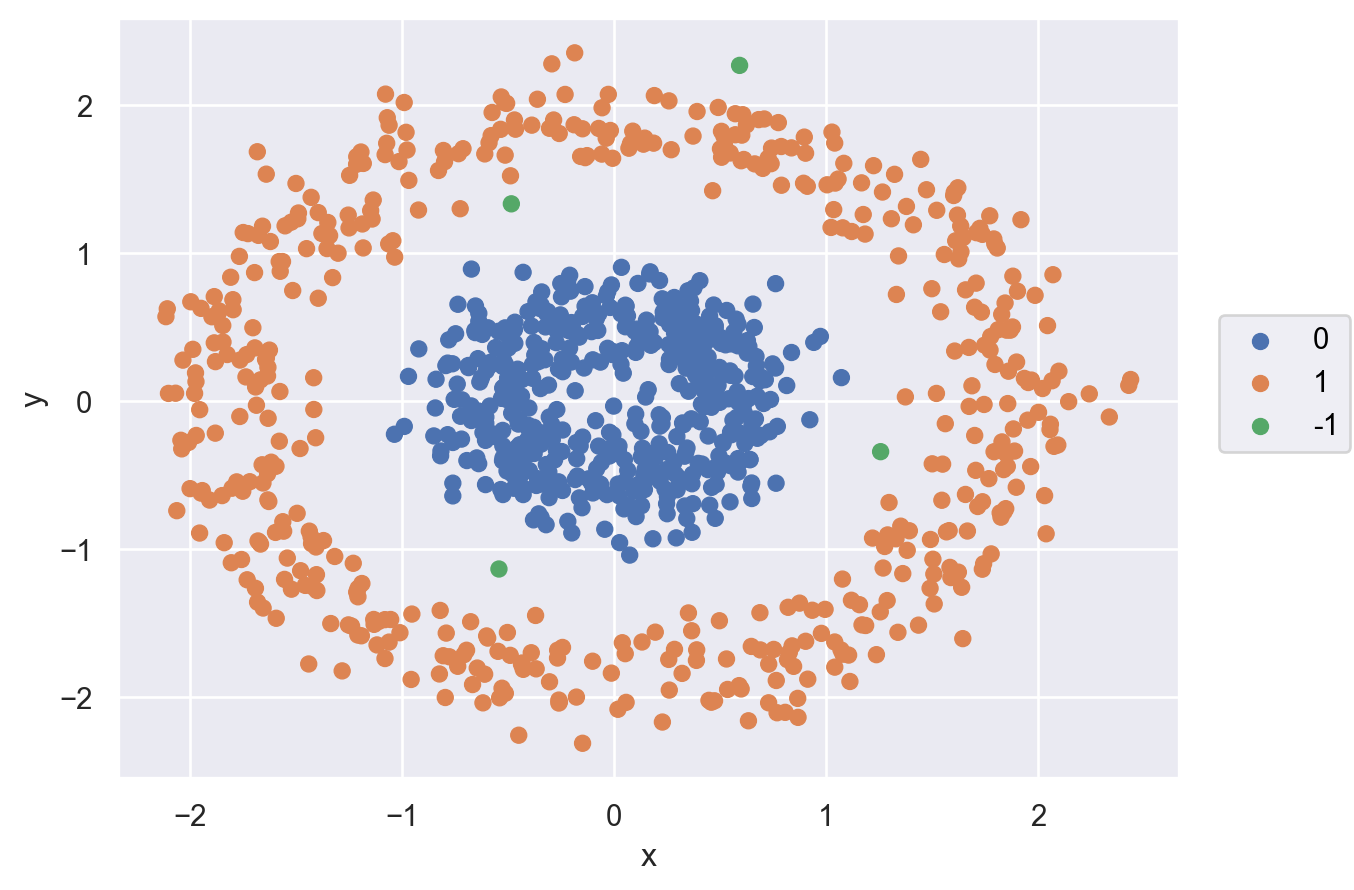

In [159]:
# Elegimos eps mas chico que la distancia que vemos entre clusters.
# Elegimos min_samples según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?)
clustering = DBSCAN(eps=0.3, min_samples=10)
etiqueta = clustering.fit_predict(datos)

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y", color = etiqueta.astype("str"))
    .add(so.Dot())
)

## Funciones útiles para la implementación del algoritmo

Implementar el algoritmo completo queda como ejercicio.

Vamos a implementar solo algunos funciones que pueden usarse para programar el algoritmo completo.

**Ejercicio 1**

1. Implementar una función que dado un conjunto de puntos (en un DataFrame), el índice de uno de los puntos y un radio eps, nos devuelva los índices de los puntos vecinos.
2. Aplicar la función al siguiente ejemplo para calcular los vecinos del punto 999.
3. Graficar todos los puntos, pintando de un color distinto los puntos hallados en el punto 2.

La salida de la función debe ser tipo "set" (conjunto), que permite fácilmente incorporar nuevos elementos al conjunto sin repetir.

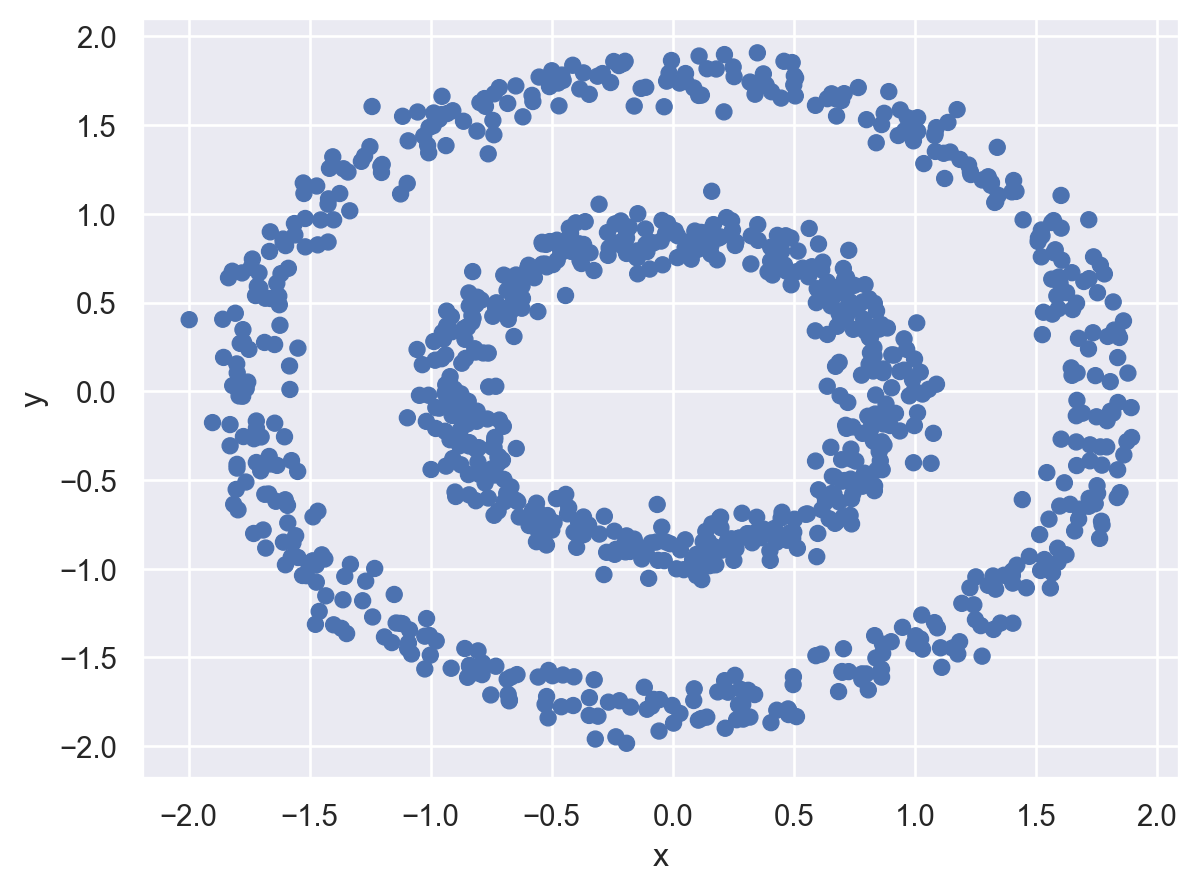

In [132]:
# Programamos DBSCAN
X, labels_true = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state = 42)
X = StandardScaler().fit_transform(X)

datos = pd.DataFrame(X)
datos.columns = ["x", "y"]

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y")
    .add(so.Dot())
)

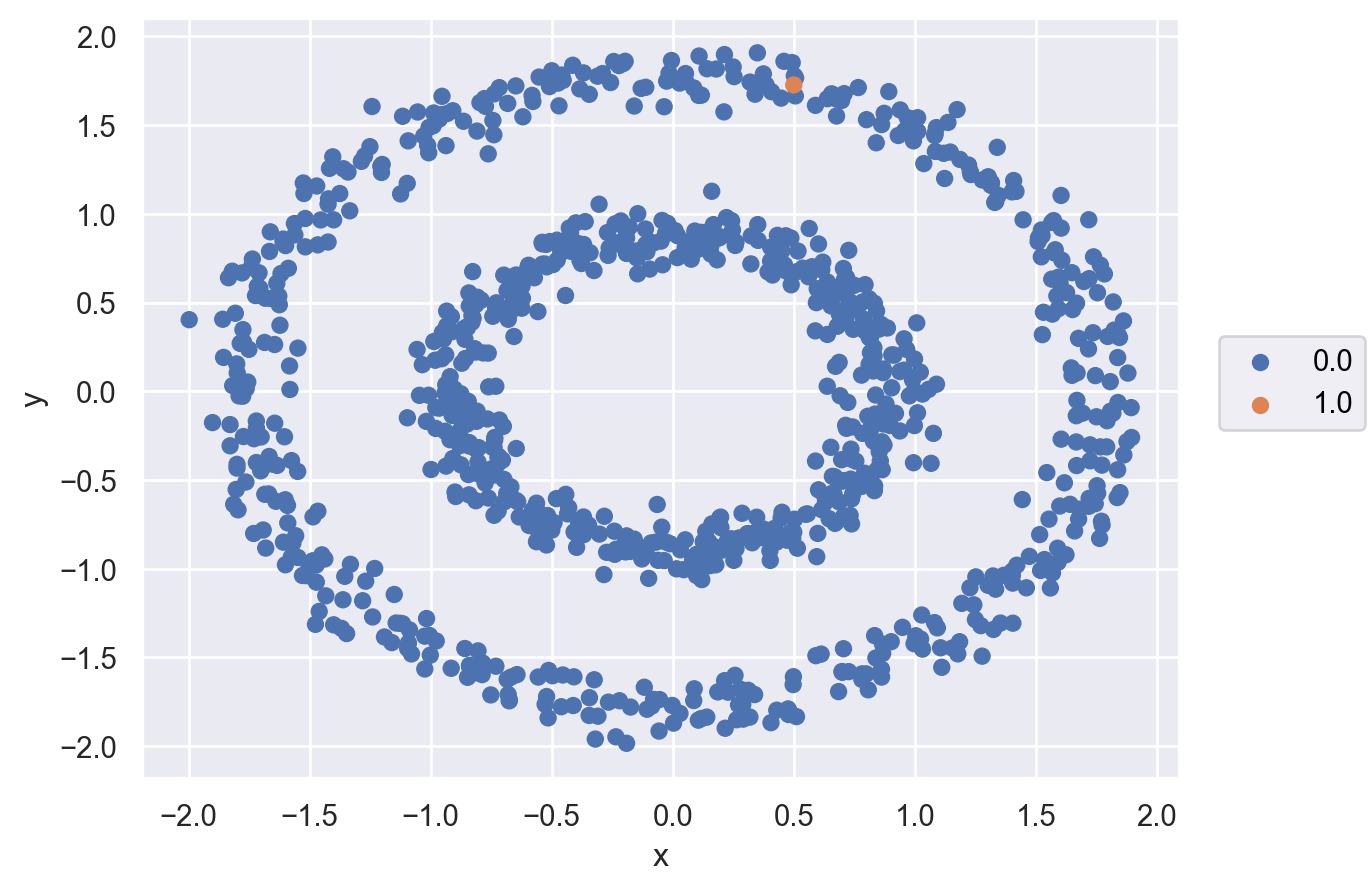

In [133]:
# Pintamos el punto 999
ind = 999
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

(
    so.Plot(data = datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

In [19]:
def obtener_vecinos(datos, ind_punto, eps):
    punto = datos.iloc[ind_punto]
    dist = np.sqrt(np.sum((datos-punto)**2, axis = 1))  # Lo vimos la clase pasada
    vecinos = set(datos[(dist < eps)].index)
    return(vecinos)


In [20]:
cjto = obtener_vecinos(datos, ind, 0.1)
print(cjto)

{995, 999, 393, 493, 983, 26}


### Tipo de datos set

In [21]:
A = {1, 2, 3, 5, 1, 4}
A

{1, 2, 3, 4, 5}

In [22]:
A.update({2,3,100})
A

{1, 2, 3, 4, 5, 100}

### Volvemos

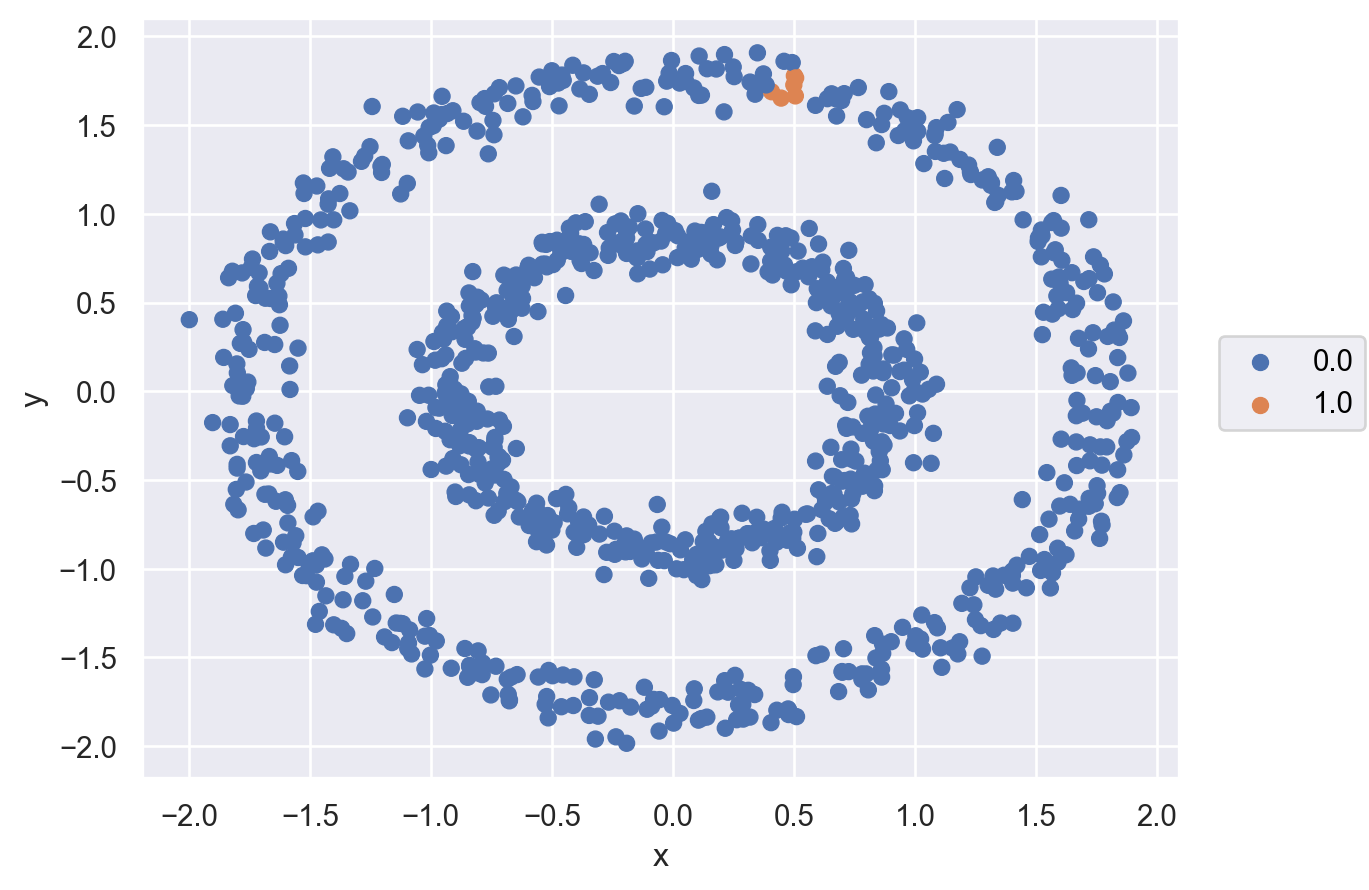

In [23]:
# Graficamos
etiquetas = np.zeros(len(datos))
etiquetas[list(cjto)] = 1

(
    so.Plot(data = datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

**Ejercicio 2**

1. Implementar una función que dado un conjunto de puntos (en un DataFrame), un vector de etiquetas correspondientes a clusters y la etiqueta de algún cluster, agregue al cluster todos los puntos directamente alcanzables desde algún punto central del cluster.
2. Aplicar la función al ejemplo del ejercicio anterior.
3. Graficar todos los puntos, pintando de un color distinto los puntos hallados en el punto 2.

Repetir los puntos 2 y 3 un par de veces y observar como crece el cluster. Qué faltaría para poder encontrar el cluster completo?

In [24]:
def extender_cluster(datos, etiquetas, cluster, eps, minPts):
    indices_cluster = datos[etiquetas == cluster].index
    for ind in indices_cluster:
        vecinos = obtener_vecinos(datos, ind, eps)
        if(len(vecinos) >= minPts): # punto central
            etiquetas[list(vecinos)] = cluster
    print("Puntos en el cluster: ", np.sum(etiquetas == cluster))
    return(etiquetas)            

In [25]:
# Pintamos el punto 999
ind = 999
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

eps = 0.3
minPts = 5

Puntos en el cluster:  25


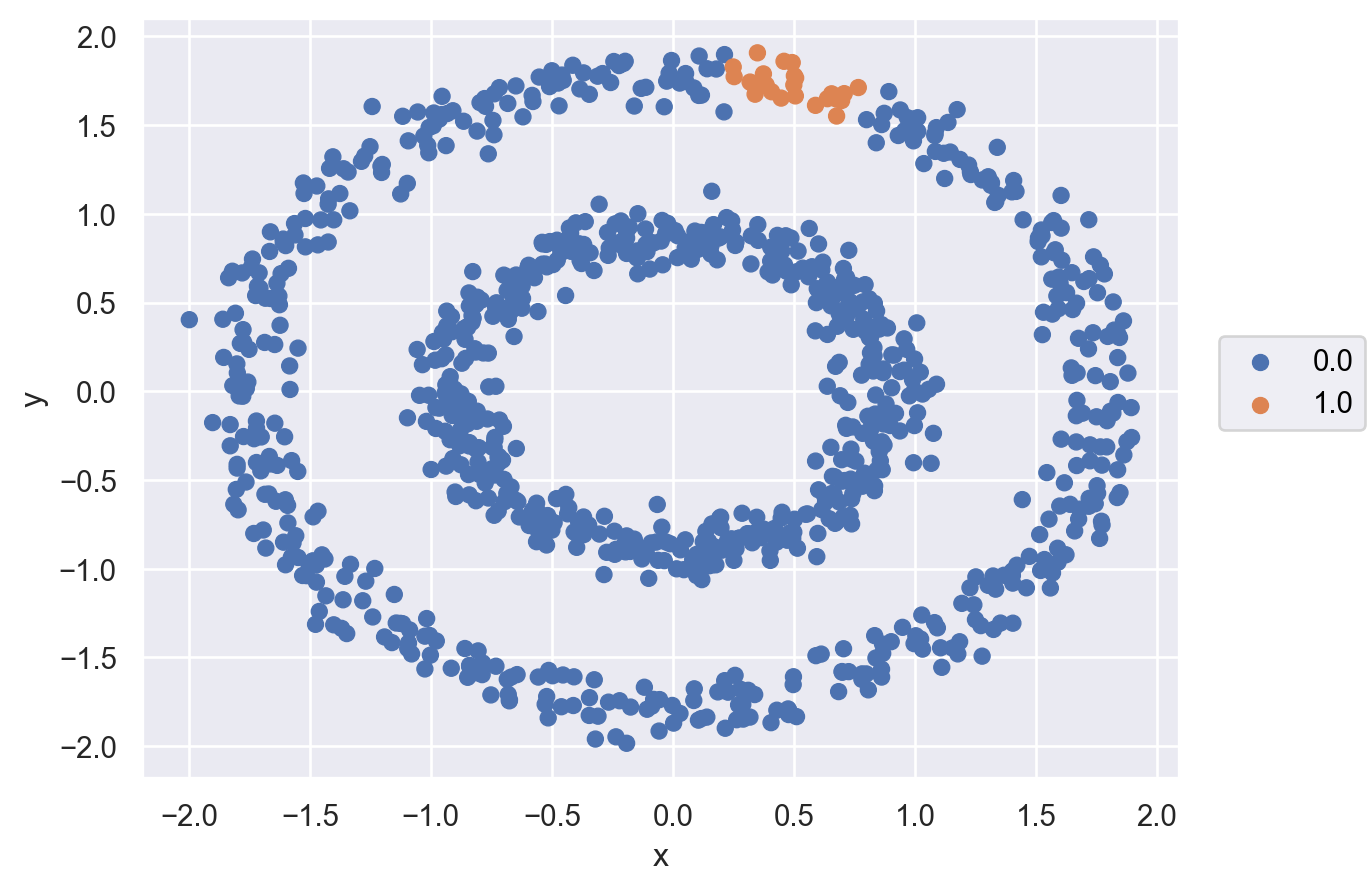

In [26]:
etiquetas = extender_cluster(datos, etiquetas, etiquetas[ind], eps, minPts)
(
    so.Plot(datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
    #.layout(size=(4, 4))
)

**Ejercicio 3**
1. Realizar mediante un for 20 iteraciones del procedimiento anterior y graficar el cluster resultante.
2. Si la cantidad de iteraciones no alcanzó para calcular todo el cluster aumentar la cantidad de iteraciones.
3. Identificar algún punto que no esté en el cluster encontrado, calcular el cluster correspondiente y graficar.

Puntos en el cluster:  18
Puntos en el cluster:  30
Puntos en el cluster:  50
Puntos en el cluster:  67
Puntos en el cluster:  80
Puntos en el cluster:  100
Puntos en el cluster:  108
Puntos en el cluster:  123
Puntos en el cluster:  137
Puntos en el cluster:  156
Puntos en el cluster:  170
Puntos en el cluster:  184
Puntos en el cluster:  195
Puntos en el cluster:  205
Puntos en el cluster:  222
Puntos en el cluster:  237
Puntos en el cluster:  251
Puntos en el cluster:  263
Puntos en el cluster:  282
Puntos en el cluster:  298
Puntos en el cluster:  315
Puntos en el cluster:  328
Puntos en el cluster:  347
Puntos en el cluster:  363
Puntos en el cluster:  378
Puntos en el cluster:  396
Puntos en el cluster:  404
Puntos en el cluster:  414
Puntos en el cluster:  428
Puntos en el cluster:  447
Puntos en el cluster:  461
Puntos en el cluster:  476
Puntos en el cluster:  490
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos

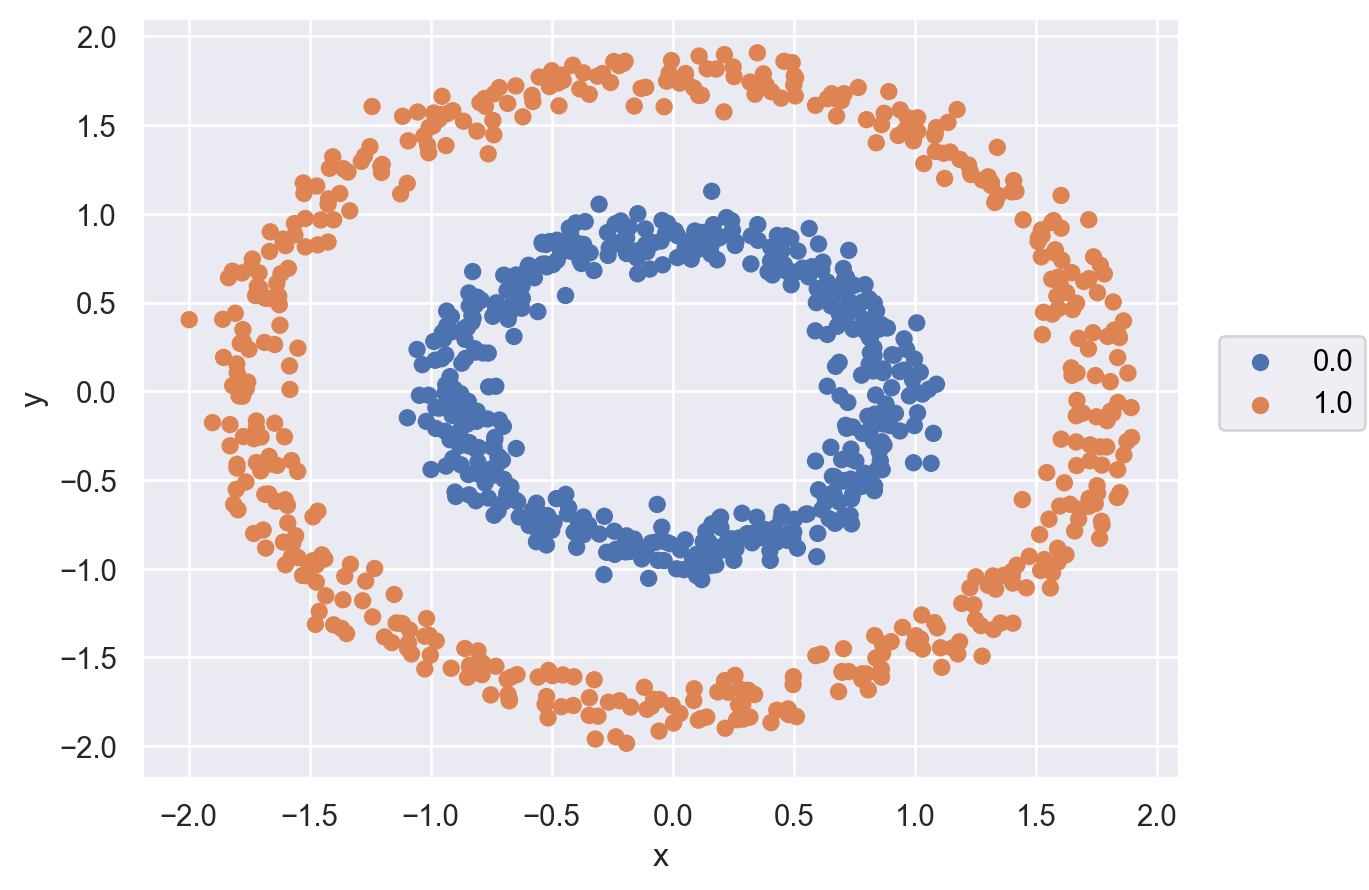

In [87]:
eps = 0.2
minPts = 5
ind = 999
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

for i in range(40):
    etiquetas = extender_cluster(datos, etiquetas, 1, eps, minPts)
    
(
    so.Plot(datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

Puntos en el cluster:  33
Puntos en el cluster:  68
Puntos en el cluster:  101
Puntos en el cluster:  134
Puntos en el cluster:  168
Puntos en el cluster:  200
Puntos en el cluster:  242
Puntos en el cluster:  278
Puntos en el cluster:  313
Puntos en el cluster:  347
Puntos en el cluster:  373
Puntos en el cluster:  411
Puntos en el cluster:  435
Puntos en el cluster:  473
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Puntos en el cluster:  500
Pun

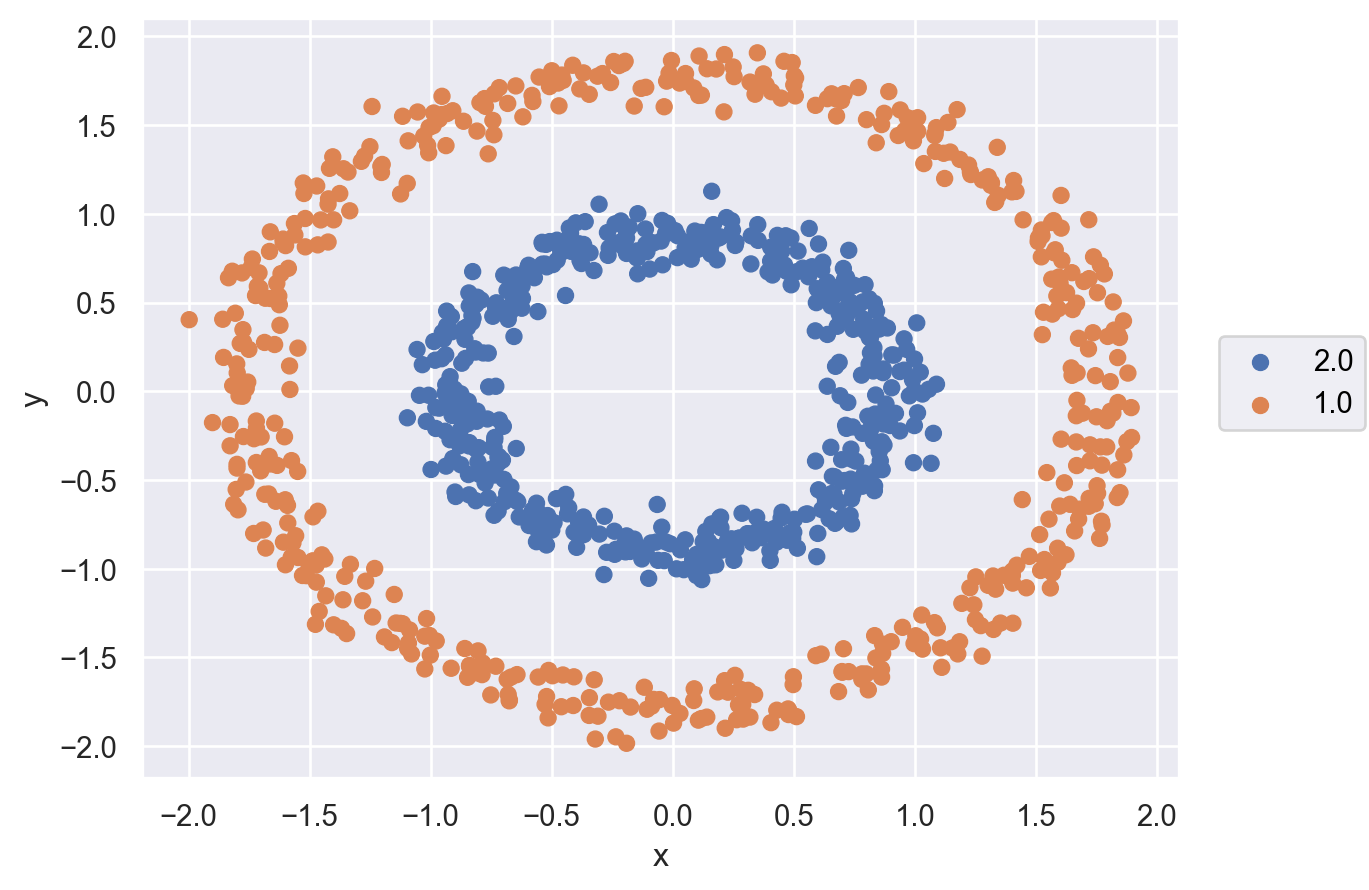

In [88]:
# Ahora queremos construir el otro cluster
etiquetas[0] = 2

for i in range(40):
    etiquetas = extender_cluster(datos, etiquetas, 2, eps, minPts)
    
(
    so.Plot(datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

# Ejemplo: detección de centros de actividad urbana
Fuente: https://bitsandbricks.github.io/post/dbscan-machine-learning-para-detectar-centros-de-actividad-urbana/

La S del nombre DBSCAN se refiere a "SPATIAL", este algoritmo es especialmente útil para detectar clusters en información espacial o en el plano, por ejemplo barrios, comunidades, focos de tormentas, etc.

Vamos a utilizarlo para detectar focos gastronómicos en la ciudad de Mendoza (más particularmente, bares).

In [91]:
# Cargamos los datos
df = pd.read_csv("../Datos/mendoza_poi.csv")
df

,nombre,tipo,categoria,lat,lng
0,Banco de la Nación Argentina,atm,banca,-32.899985,-68.842262
1,Hospital Central BANCO DE LA NACION ARGENTINA ...,atm,banca,-32.892059,-68.832881
2,Banelco,atm,banca,-32.894630,-68.840298
3,Banelco,atm,banca,-32.893645,-68.839958
4,Cajero Automatico Banelco,atm,banca,-32.892873,-68.839935
...,...,...,...,...,...
27906,Moyano 2799,transit_station,transporte,-32.837847,-68.817439
27907,Tierra Del Fuego,transit_station,transporte,-32.844113,-68.874464
27908,La Pampa,transit_station,transporte,-32.841870,-68.872701
27909,Tierra Del Fuego,transit_station,transporte,-32.843631,-68.869682


In [92]:
# Tenemos negocios de distintas categorias
df.categoria.unique()

array(['banca', 'cultura', 'culto', 'educacion', 'entretenimiento',
       'espacios_verdes', 'gastronomia', 'gobierno_y_serv_publicos',
       'retail', 'servicios', 'salud', 'transporte'], dtype=object)

In [93]:
# Veamos los distintos tipos de locales gastronomicos

# Utilizamos query en lugar de df[df.categoria == "gastronomia"]
df.query("categoria == 'gastronomia'").tipo.unique()

array(['food', 'meal_delivery', 'restaurant', 'cafe', 'meal_takeaway',
       'bar'], dtype=object)

In [94]:
# Nos quedamos solo con los bares
datosBares = df.query("categoria == 'gastronomia' and tipo == 'bar'").reset_index()
datosBares

,index,nombre,tipo,categoria,lat,lng
0,2246,Cachavacha Bar,bar,gastronomia,-32.905599,-68.800351
1,2247,GO bar,bar,gastronomia,-32.914203,-68.821620
2,2248,Barometroclub Godoy Cruz,bar,gastronomia,-32.941565,-68.847243
3,2249,What is Resto Bar,bar,gastronomia,-32.945495,-68.854171
4,2250,Hangar 52 Beer Garden,bar,gastronomia,-32.931867,-68.850053
...,...,...,...,...,...,...
316,2601,Hard Lomo Rock Pub,bar,gastronomia,-32.850023,-68.837255
317,2602,Wine y Drink 1141,bar,gastronomia,-32.854227,-68.838196
318,2603,Vinoteca Hiervin,bar,gastronomia,-32.843342,-68.833644
319,2604,Cacho Fort,bar,gastronomia,-32.858998,-68.833201


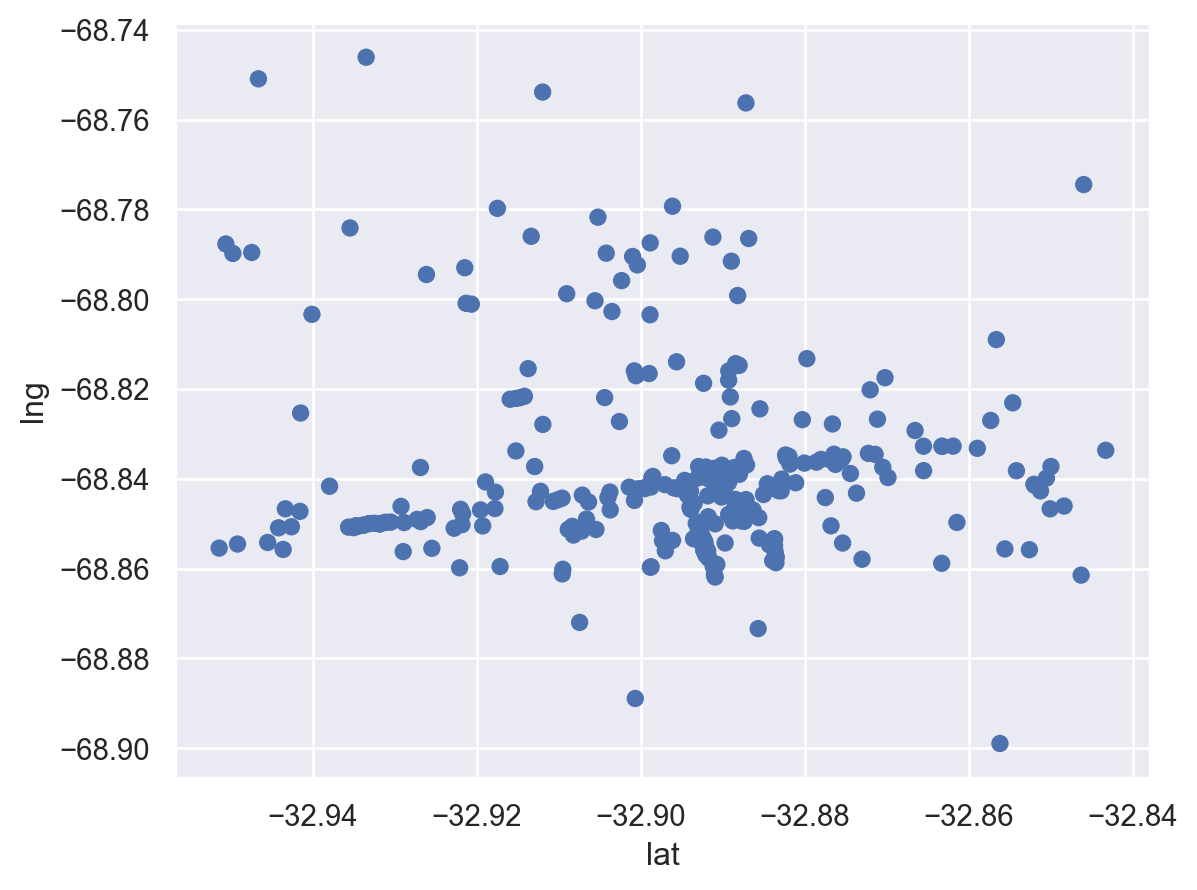

In [95]:
# Graficamos
so.Plot(data = datosBares, x = "lat", y = "lng").add(so.Dot())

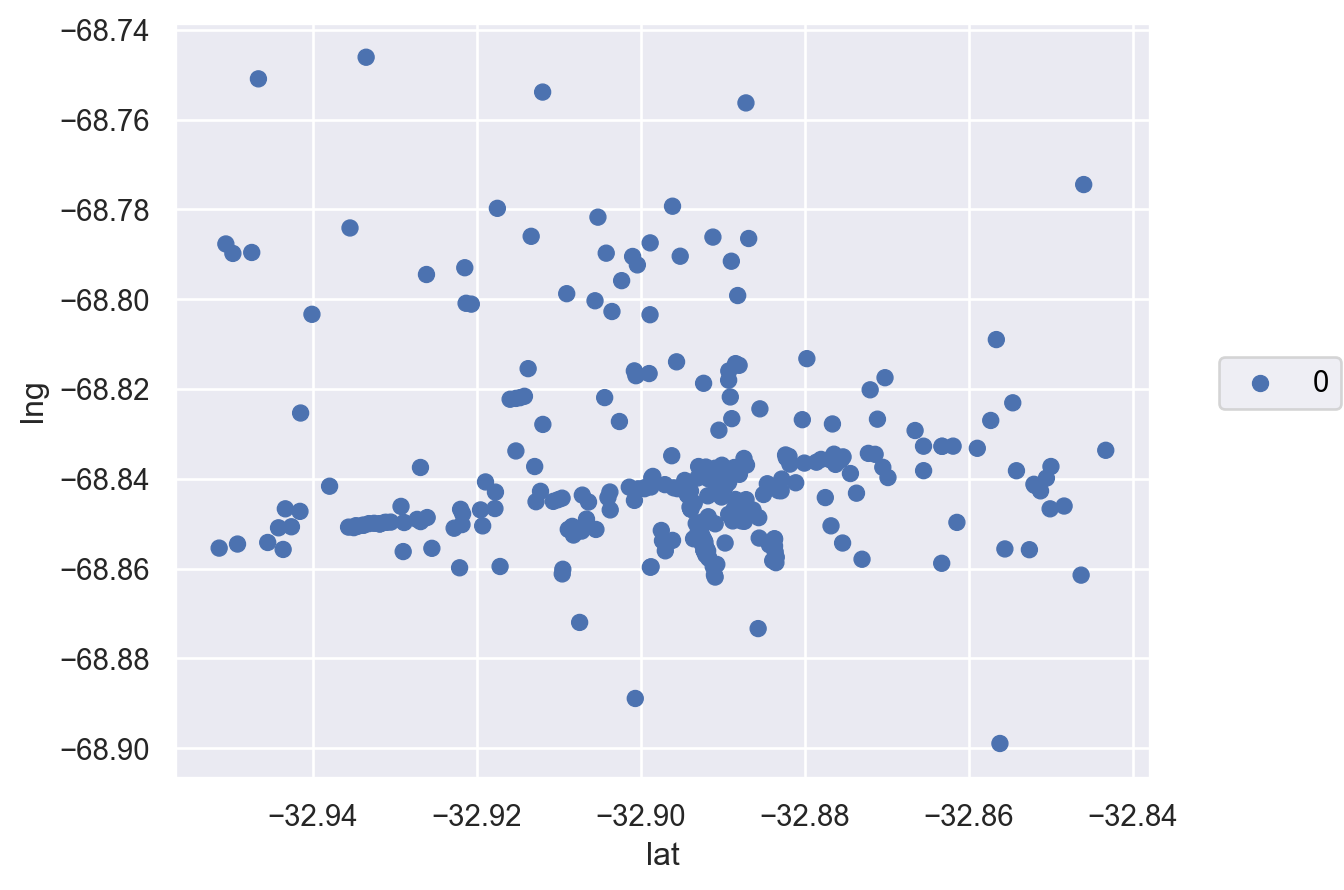

In [98]:
# Aplicamos DBSCAN eligiendo los parámetros arbitrariamente.
# eps: a que distancia esperamos que esten los bares cercanos
# minPts: cuantos bares esperamos que tenga cerca un bar para considerarlo una zona de bares

# Usamos solo las variables de latitud y longitud para el agrupamiento.
# Para puntos más alejados (datos de un país o continente), podemos usar una función auxiliar para calcular la distancia entre puntos)

clustering = DBSCAN(eps=0.1, min_samples=6)
etiqueta = clustering.fit_predict(datosBares[["lat", "lng"]])

(
    so.Plot(data = datosBares, x = "lat", y = "lng", color = etiqueta.astype("str"))
    .add(so.Dot())
)

# Selección del hiperparámetro eps

Los valores eps y minPts son hiperparámetros, no se pueden aprender de los datos, pero algunas técnicas nos pueden ayudar.

Para el valor de esp, calculamos para cada bar a qué distancia está el bar más cercano y graficamos los valores ordenados de menor a mayor.

In [99]:
from sklearn.neighbors import NearestNeighbors

dataset = datosBares[["lat", "lng"]]
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(dataset)


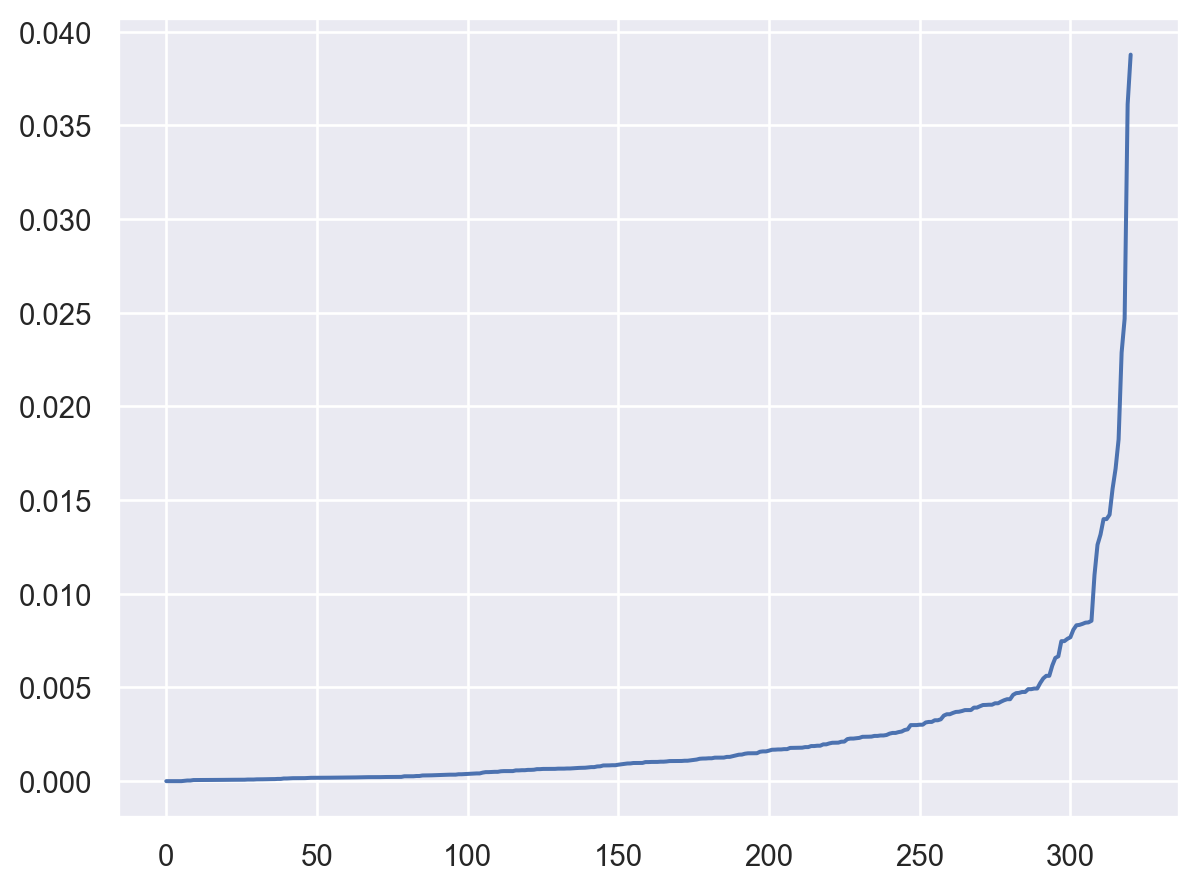

In [111]:
# Ordenamos de menor a mayor las distancias y graficamos
distances, indices = neighbors_fit.kneighbors(dataset)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

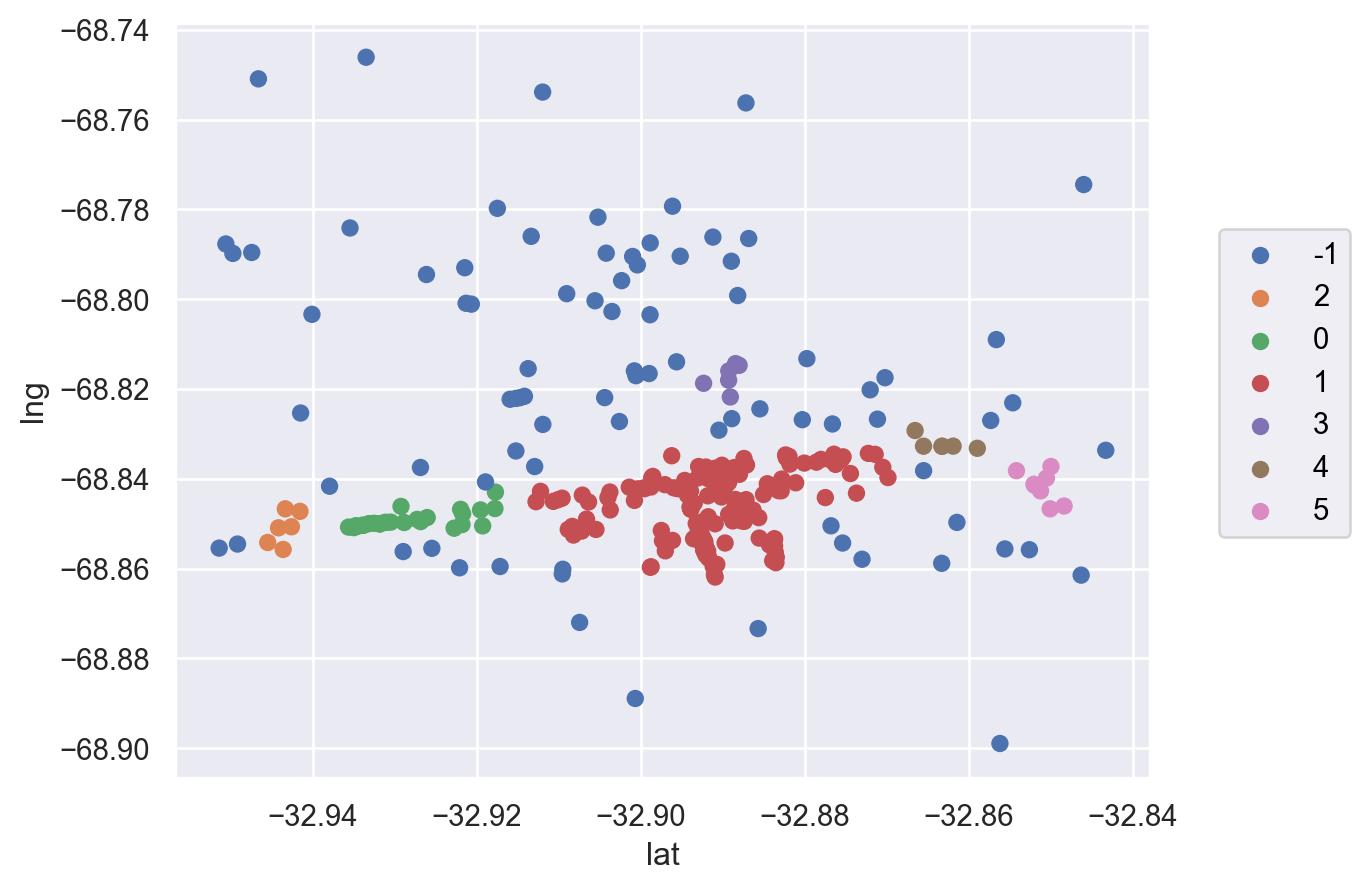

In [117]:
# Elegimos el eps donde la curva hace un codo.
# De esta forma tenemos un valor pequeño que incluye a la mayoria de los datos.
# Tomamos eps = 0.005.
clustering = DBSCAN(eps=0.005, min_samples=6)
etiqueta = clustering.fit_predict(datosBares[["lat", "lng"]])

(
    so.Plot(data = datosBares, x = "lat", y = "lng", color = etiqueta.astype("str"))
    .add(so.Dot())
)

Entontramos 6 zonas de bares, una grande central y otras perifericas. 

Si queremos separar la zona central en distintas zonas, podemos tomar un valor de eps mas pequeño.
